In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
import datetime

import pickle

import random

In [4]:
house3 = pd.read_csv('/Users/tchouar/code_stage/all_data/new_data/data/House3.csv', parse_dates=['time'], index_col='unix')
print(house3.shape)

(4676401, 12)


In [5]:
house3 = house3[['time', 'fridge freezer']]

In [6]:
fridge_data = house3['fridge freezer'].values.reshape(-1, 1)

#  application de K-means
kmeans = KMeans(n_clusters=3, random_state=10).fit(fridge_data)
labels = kmeans.labels_
house3['Cluster'] = labels


In [7]:
house3.rename(columns={'Cluster': 'État'}, inplace=True)

In [8]:
house3[house3['État'] == 1].head(5) # l'équivaleu du 0 sur colab 

,time,fridge freezer,État
unix,,,
1395360000,2014-03-21 00:00:00,0.0,1
1395360008,2014-03-21 00:00:08,0.0,1
1395360016,2014-03-21 00:00:16,0.0,1
1395360024,2014-03-21 00:00:24,0.0,1
1395360032,2014-03-21 00:00:32,0.0,1


In [10]:
house3[house3['État'] == 2].head(5) # etat 2 c'est le l'état transitoir 

,time,fridge freezer,État
unix,,,
1395385184,2014-03-21 06:59:44,258.0,2
1395385192,2014-03-21 06:59:52,258.0,2
1395385200,2014-03-21 07:00:00,257.0,2
1395385208,2014-03-21 07:00:08,257.0,2
1395385216,2014-03-21 07:00:16,256.0,2


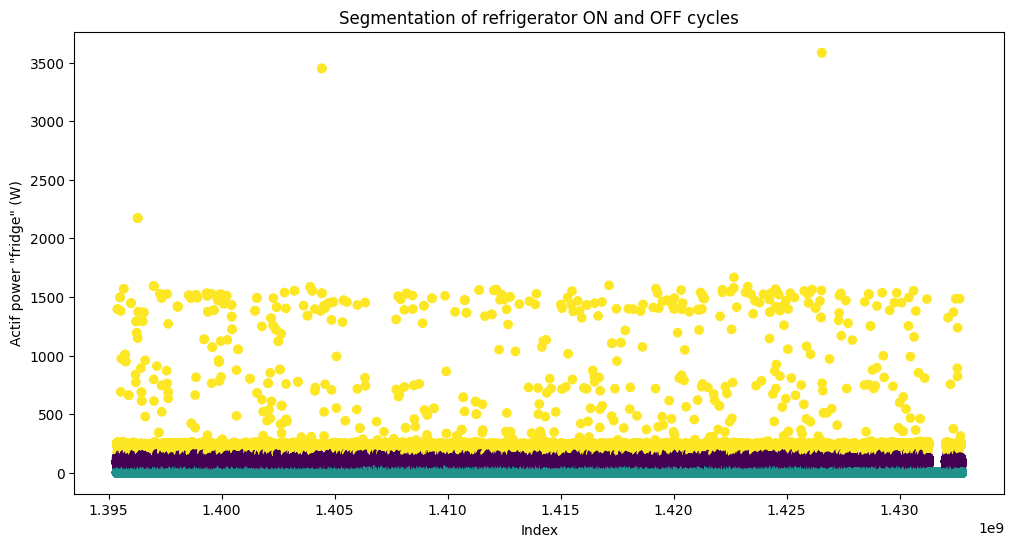

Centres de clusters: [[9.31617467e+01]
 [2.28825823e-01]
 [2.41438611e+02]]


In [11]:


# cette partie pour visualiser les résultats du K-means, elle prend quelques minutes
plt.figure(figsize=(12, 6))
#plt.scatter(range(len(fridge_data)), fridge_data, c=labels)
plt.scatter(house3.index, fridge_data, c=labels)
plt.title('Segmentation of refrigerator ON and OFF cycles')
plt.xlabel('Index')
plt.ylabel('Actif power "fridge" (W)')
plt.show()


print("Centres de clusters:", kmeans.cluster_centers_)


In [8]:
house3[house3['État'] == 1].max()

time              2015-05-27 23:15:52
fridge freezer                  660.0
État                                1
dtype: object

In [12]:
with open('new_generated_sample.pkl', 'rb') as fichier:
    anomaly_pattern = pickle.load(fichier)

#### fini avec GMM

In [ ]:
anomaly_pattern 


## important
random values from ON state, in this notebook État =1

In [51]:
60*60

3600

In [30]:
mask

,time,fridge freezer,État
unix,,,
1395362520,2014-03-21 00:42:00,97.5,1
1395362528,2014-03-21 00:42:08,97.0,1
1395362536,2014-03-21 00:42:16,94.0,1
1395362544,2014-03-21 00:42:24,94.0,1
1395362552,2014-03-21 00:42:32,92.0,1
...,...,...,...
1432768520,2015-05-27 23:15:20,81.0,1
1432768528,2015-05-27 23:15:28,81.0,1
1432768536,2015-05-27 23:15:36,82.0,1


In [14]:
house3.head()

,time,fridge freezer,État
unix,,,
1395360000,2014-03-21 00:00:00,0.0,1
1395360008,2014-03-21 00:00:08,0.0,1
1395360016,2014-03-21 00:00:16,0.0,1
1395360024,2014-03-21 00:00:24,0.0,1
1395360032,2014-03-21 00:00:32,0.0,1


In [15]:
house3['État2'] = house3['État'].shift(1)

In [16]:
house3.head(2)

,time,fridge freezer,État,État2
unix,,,,
1395360000,2014-03-21 00:00:00,0.0,1,NaN
1395360008,2014-03-21 00:00:08,0.0,1,1.0


In [17]:
transition = house3[house3['État'] !=house3['État2'] ]

In [18]:
transition.head()

,time,fridge freezer,État,État2
unix,,,,
1395360000,2014-03-21 00:00:00,0.0,1,NaN
1395360792,2014-03-21 00:13:12,126.0,0,1.0
1395363448,2014-03-21 00:57:28,4.0,1,0.0
1395369024,2014-03-21 02:30:24,136.0,0,1.0
1395369712,2014-03-21 02:41:52,0.0,1,0.0


In [19]:
transition['end_time'] = transition['time'].shift(-1)

/var/folders/87/c96z3lj528s0yqr3y568z9qr0000gn/T/ipykernel_10961/758562897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transition['end_time'] = transition['time'].shift(-1)


In [20]:
transition_on = transition[transition['État'] == 1]

In [21]:
liste_duration = []
for index, row in transition.iterrows():
    if pd.isnull(row['end_time']):
        print('--')
        liste_duration.append(0)
        continue
    
    endunix = int(row['end_time'].timestamp())
    duration = int((endunix - index) / 8) # nombre de lignes 
    liste_duration.append(duration)
    #print(endunix)

--


In [22]:
transition['Duration'] = liste_duration
transition.head()

/var/folders/87/c96z3lj528s0yqr3y568z9qr0000gn/T/ipykernel_10961/1378316223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transition['Duration'] = liste_duration


,time,fridge freezer,État,État2,end_time,Duration
unix,,,,,,
1395360000,2014-03-21 00:00:00,0.0,1,NaN,2014-03-21 00:13:12,99
1395360792,2014-03-21 00:13:12,126.0,0,1.0,2014-03-21 00:57:28,332
1395363448,2014-03-21 00:57:28,4.0,1,0.0,2014-03-21 02:30:24,697
1395369024,2014-03-21 02:30:24,136.0,0,1.0,2014-03-21 02:41:52,86
1395369712,2014-03-21 02:41:52,0.0,1,0.0,2014-03-21 02:42:00,1


In [33]:
transition[transition['État']== 2].min()# 0 état qui correspond a ON

time              2014-03-21 06:59:44
fridge freezer                  167.5
État                                2
État2                             0.0
end_time          2014-03-21 07:20:48
Duration                            1
dtype: object

In [36]:
transition[transition['État']== 0].max()# 0 état qui correspond a ON

time              2015-05-27 21:12:00
fridge freezer                  167.0
État                                0
État2                             2.0
end_time          2015-05-27 22:39:20
Duration                         3801
dtype: object

In [49]:
transition_on = transition[transition['État']== 0]
transition_on


,time,fridge freezer,État,État2,end_time,Duration
unix,,,,,,
1395360792,2014-03-21 00:13:12,126.0,0,1.0,2014-03-21 00:57:28,332
1395369024,2014-03-21 02:30:24,136.0,0,1.0,2014-03-21 02:41:52,86
1395369720,2014-03-21 02:42:00,99.0,0,1.0,2014-03-21 03:01:28,146
1395370904,2014-03-21 03:01:44,94.0,0,1.0,2014-03-21 03:12:32,81
1395377488,2014-03-21 04:51:28,111.0,0,1.0,2014-03-21 05:32:56,311
...,...,...,...,...,...,...
1432722624,2015-05-27 10:30:24,106.0,0,1.0,2015-05-27 11:04:16,254
1432726184,2015-05-27 11:29:44,75.0,0,2.0,2015-05-27 12:58:24,665
1432736016,2015-05-27 14:13:36,109.0,0,1.0,2015-05-27 16:56:32,1222


In [50]:
house3.head()

,time,fridge freezer,État,État2
unix,,,,
1395360000,2014-03-21 00:00:00,0.0,1,NaN
1395360008,2014-03-21 00:00:08,0.0,1,1.0
1395360016,2014-03-21 00:00:16,0.0,1,1.0
1395360024,2014-03-21 00:00:24,0.0,1,1.0
1395360032,2014-03-21 00:00:32,0.0,1,1.0


<Axes: xlabel='unix'>

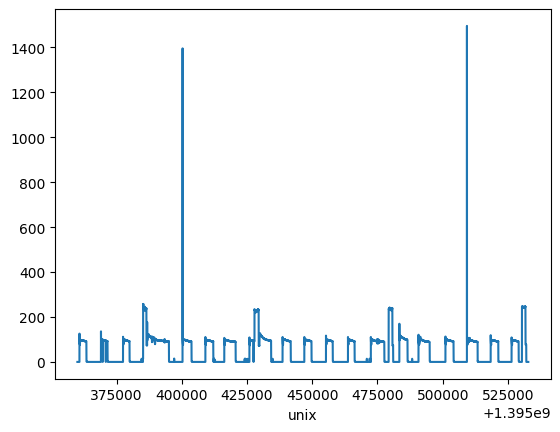

In [48]:
house3.loc[1395360000 : 1395360000+2*86400, 'fridge freezer'].plot()

In [43]:
3600*24

86400

In [67]:
transition_on['Duration'].max()

3801

In [68]:
3801 * 8

30408

In [69]:
60*60

3600

In [51]:
transition_on['Duration'].mean()

293.01163692785104

In [65]:
transition_on['Duration'].std()

406.55660743473294

In [66]:
406 * 8

3248

In [52]:
293 * 8

2344

In [52]:
60*60

3600

In [54]:
def elongated_anomalies_insertion(df, mask, num_anomalies, duration_hours, generated_sample,  duty_cycle):


    valid_indices = [i for i in mask.index if (i % 8 == 0)]
    ramdom_anomalies_unix = []

    # Générer les anomalies espacées d'au moins 3600, pour qu'il n'y ai pas de chevauchement 
    while len(ramdom_anomalies_unix) < num_anomalies: 
        random_index = random.choice(valid_indices)
        if all(abs(random_index - anomaly) >= 3600 for anomaly in ramdom_anomalies_unix):
            # Ajouter l'index à la liste des anomalies
            ramdom_anomalies_unix.append(random_index)  



    #ramdom_anomalies_unix = random.sample([i for i in mask.index if (i % 8 == 0)], num_anomalies) # ici je met mask



    cycle_stats = []
    df_anomaly = df[['time', 'fridge freezer', 'État']].copy()
    df_anomaly['anomaly'] = 0

    # elongated anomaly :
    duration_seconds = duration_hours * 450 # en 8s, en lignes
    for unix in ramdom_anomalies_unix:
        start_idx = unix
        end_idx = (start_idx + duration_seconds*8 )

        on_seconds = int(duration_seconds * duty_cycle)

        off_seconds = duration_seconds - on_seconds

        var =  generated_sample[:on_seconds]



        #print(list(var).type)
        #print(list(var))
        #var2 = var.sort()
        var.sort(reverse = True)
        #print(var2)
        final_patern = var + [0] * off_seconds


        #print(len(anomaly_pattern2))
        #print(len(df_anomaly.loc[start_idx:end_idx-8]))

        if len(final_patern) == len(df_anomaly.loc[unix:end_idx-8]) :
            duration = end_idx - start_idx

            df_anomaly.loc[unix:end_idx-8, 'fridge freezer'] = final_patern
            df_anomaly.loc[unix:end_idx-8, 'anomaly'] = 2
            df_anomaly.loc[unix:end_idx-8, 'État'] = 1
            cycle_stats.append({
                'start_index': start_idx,
                'end_index': end_idx,
                'anomaly_type' : "elongated",
                'Duré' : duration,
            })
        else :
            print(f'length of patern is {len(final_patern)}')
            print(f'length of tha anomaly part is {len(df_anomaly.loc[unix:end_idx-8])}')
            print(f'la durée en seconde est : {duration_seconds}')

    cycle_stats = pd.DataFrame(cycle_stats)



    return df_anomaly, cycle_stats




In [55]:
df_anomaly, df_elongated_stat = elongated_anomalies_insertion(df = house3,mask = transition_on, num_anomalies= 6, duration_hours= 1, generated_sample= anomaly_pattern, duty_cycle =0.90)

In [56]:
df_elongated_stat

,start_index,end_index,anomaly_type,Duré
0,1410055664,1410059264,elongated,3600
1,1429081968,1429085568,elongated,3600
2,1415923752,1415927352,elongated,3600
3,1410072632,1410076232,elongated,3600
4,1409743096,1409746696,elongated,3600
5,1415974568,1415978168,elongated,3600


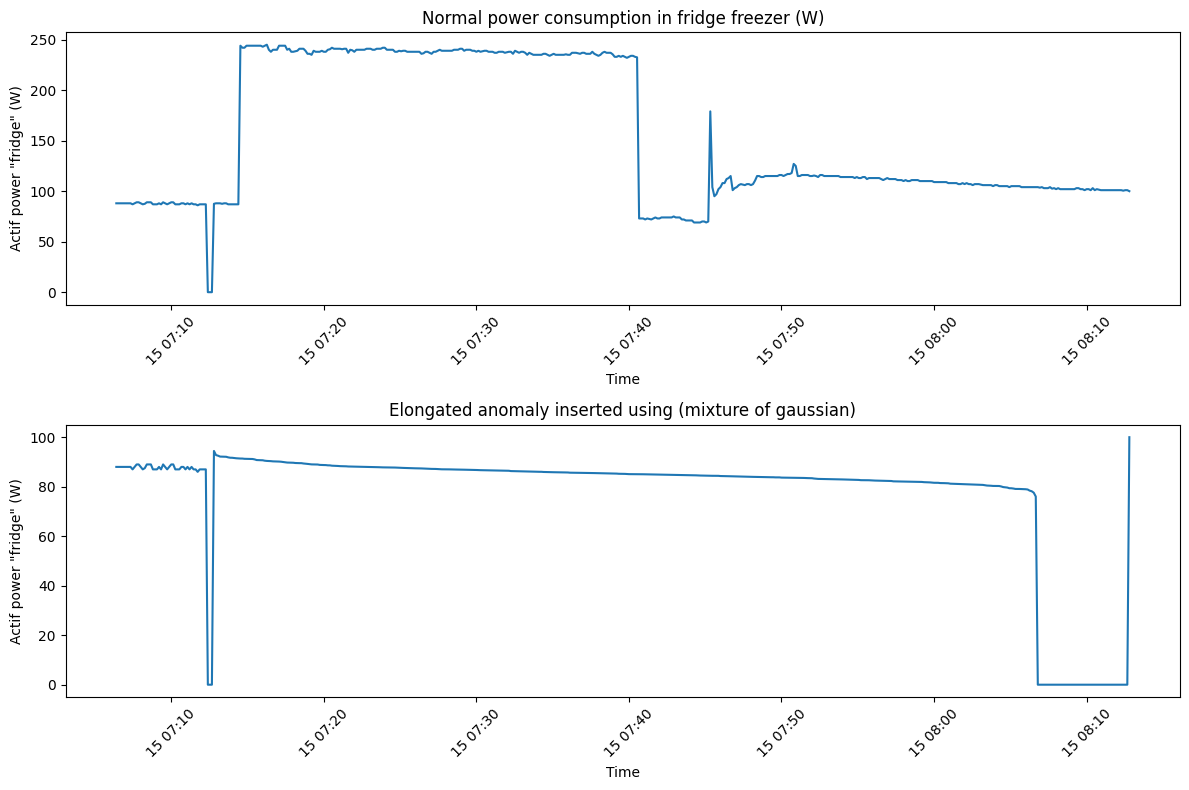

In [58]:
# 

# Créer une nouvelle figure
plt.figure(figsize=(12, 8))

# Premier sous-graphique
plt.subplot(2, 1, 1)  # 2 lignes, 1 colonne, 1er sous-graphique
plt.plot(house3.loc[1429081968-(3*128) : 1429085568, 'time'], house3.loc[1429081968-(3*128) : 1429085568, 'fridge freezer'])
plt.title("Normal power consumption in fridge freezer (W)")
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Actif power \"fridge\" (W)')


plt.subplot(2, 1, 2)  # 2 lignes, 1 colonne, 2e sous-graphique
plt.plot(df_anomaly.loc[1429081968-(3*128) : 1429085568, 'time'], df_anomaly.loc[1429081968-(3*128) : 1429085568, 'fridge freezer'])
plt.title("Elongated anomaly inserted using (mixture of gaussian)")
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Actif power \"fridge\" (W)')

# Ajuster la mise en page pour éviter le chevauchement
plt.tight_layout()

# Afficher la figure
plt.show()


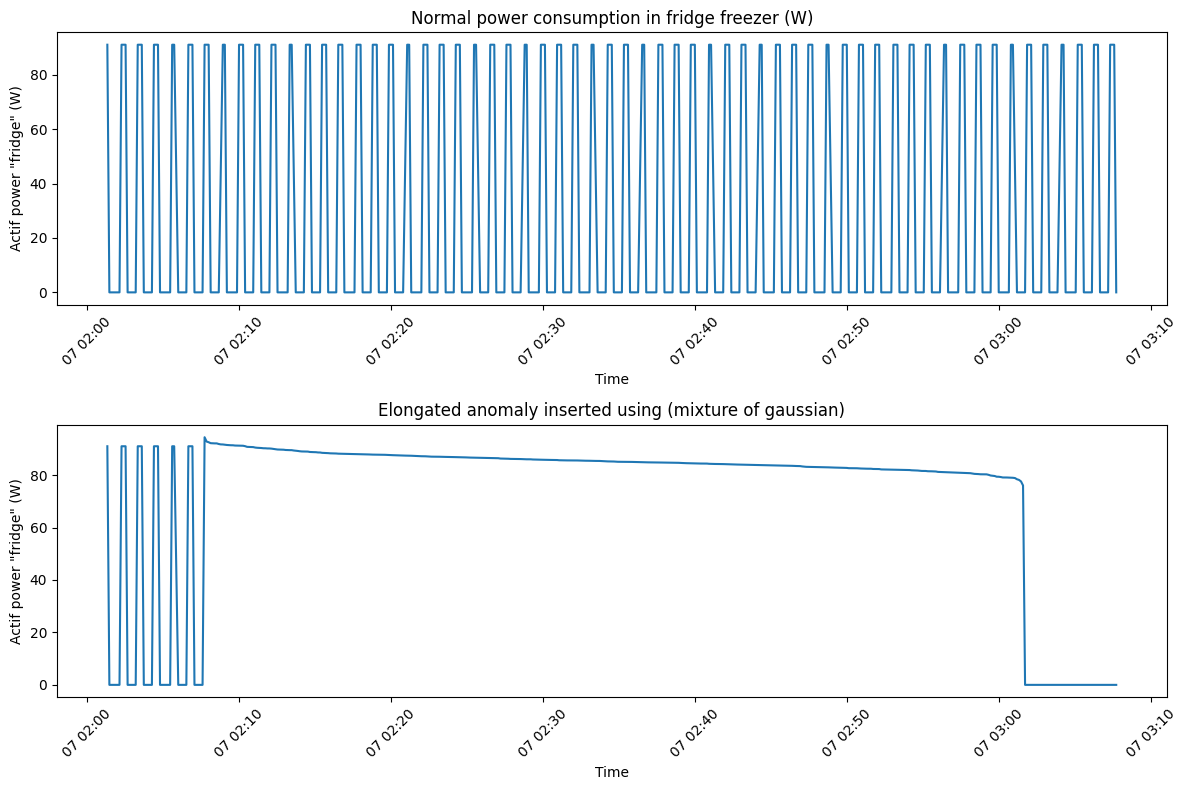

In [57]:
# 

# Créer une nouvelle figure
plt.figure(figsize=(12, 8))

# Premier sous-graphique
plt.subplot(2, 1, 1)  # 2 lignes, 1 colonne, 1er sous-graphique
plt.plot(house3.loc[1410055664-(3*128) : 1410059264, 'time'], house3.loc[1410055664-(3*128) : 1410059264, 'fridge freezer'])
plt.title("Normal power consumption in fridge freezer (W)")
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Actif power \"fridge\" (W)')


plt.subplot(2, 1, 2)  # 2 lignes, 1 colonne, 2e sous-graphique
plt.plot(df_anomaly.loc[1410055664-(3*128) : 1410059264, 'time'], df_anomaly.loc[1410055664-(3*128) : 1410059264, 'fridge freezer'])
plt.title("Elongated anomaly inserted using (mixture of gaussian)")
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Actif power \"fridge\" (W)')

# Ajuster la mise en page pour éviter le chevauchement
plt.tight_layout()

# Afficher la figure
plt.show()


In [59]:
df_elongated_stat

,start_index,end_index,anomaly_type,Duré
0,1410055664,1410059264,elongated,3600
1,1429081968,1429085568,elongated,3600
2,1415923752,1415927352,elongated,3600
3,1410072632,1410076232,elongated,3600
4,1409743096,1409746696,elongated,3600
5,1415974568,1415978168,elongated,3600


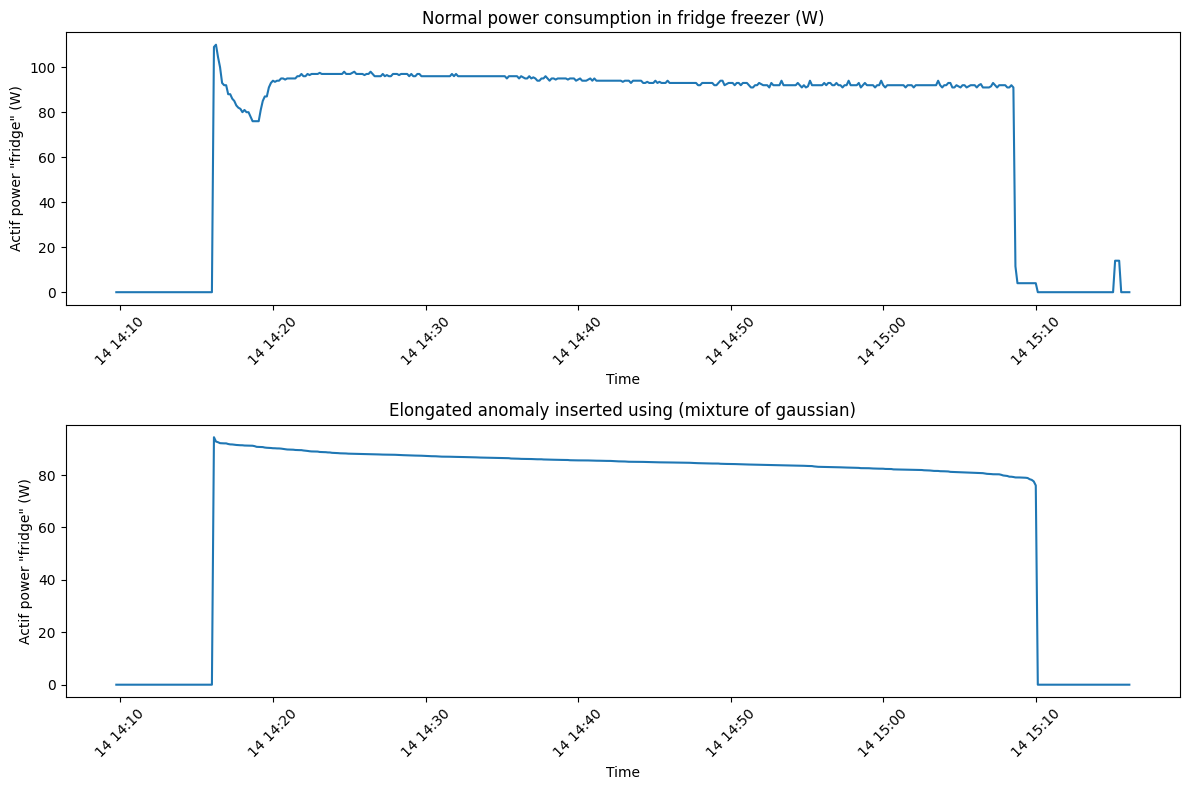

In [61]:
# 

# Créer une nouvelle figure
plt.figure(figsize=(12, 8))

# Premier sous-graphique
plt.subplot(2, 1, 1)  # 2 lignes, 1 colonne, 1er sous-graphique
plt.plot(house3.loc[1415974568-(3*128) : 1415978168, 'time'], house3.loc[1415974568-(3*128) : 1415978168, 'fridge freezer'])
plt.title("Normal power consumption in fridge freezer (W)")
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Actif power \"fridge\" (W)')


plt.subplot(2, 1, 2)  # 2 lignes, 1 colonne, 2e sous-graphique
plt.plot(df_anomaly.loc[1415974568-(3*128) : 1415978168, 'time'], df_anomaly.loc[1415974568-(3*128) : 1415978168, 'fridge freezer'])
plt.title("Elongated anomaly inserted using (mixture of gaussian)")
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Actif power \"fridge\" (W)')

# Ajuster la mise en page pour éviter le chevauchement
plt.tight_layout()

# Afficher la figure
plt.show()


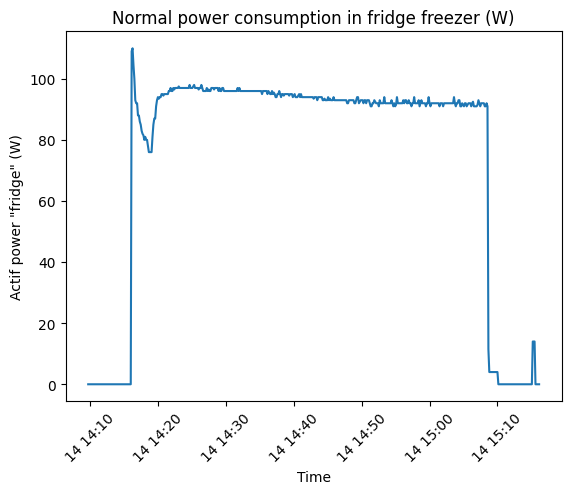

In [63]:
#plt.plot(house3.loc[1415974568-(3*128) : 1415978168, 'time'], house3.loc[1415974568-(3*128) : 1418896888, 'fridge freezer'])
plt.plot(house3.loc[1415974568-(3*128) : 1415978168, 'time'], house3.loc[1415974568-(3*128) : 1415978168, 'fridge freezer'])
plt.title("Normal power consumption in fridge freezer (W)")
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Actif power \"fridge\" (W)')
plt.show()

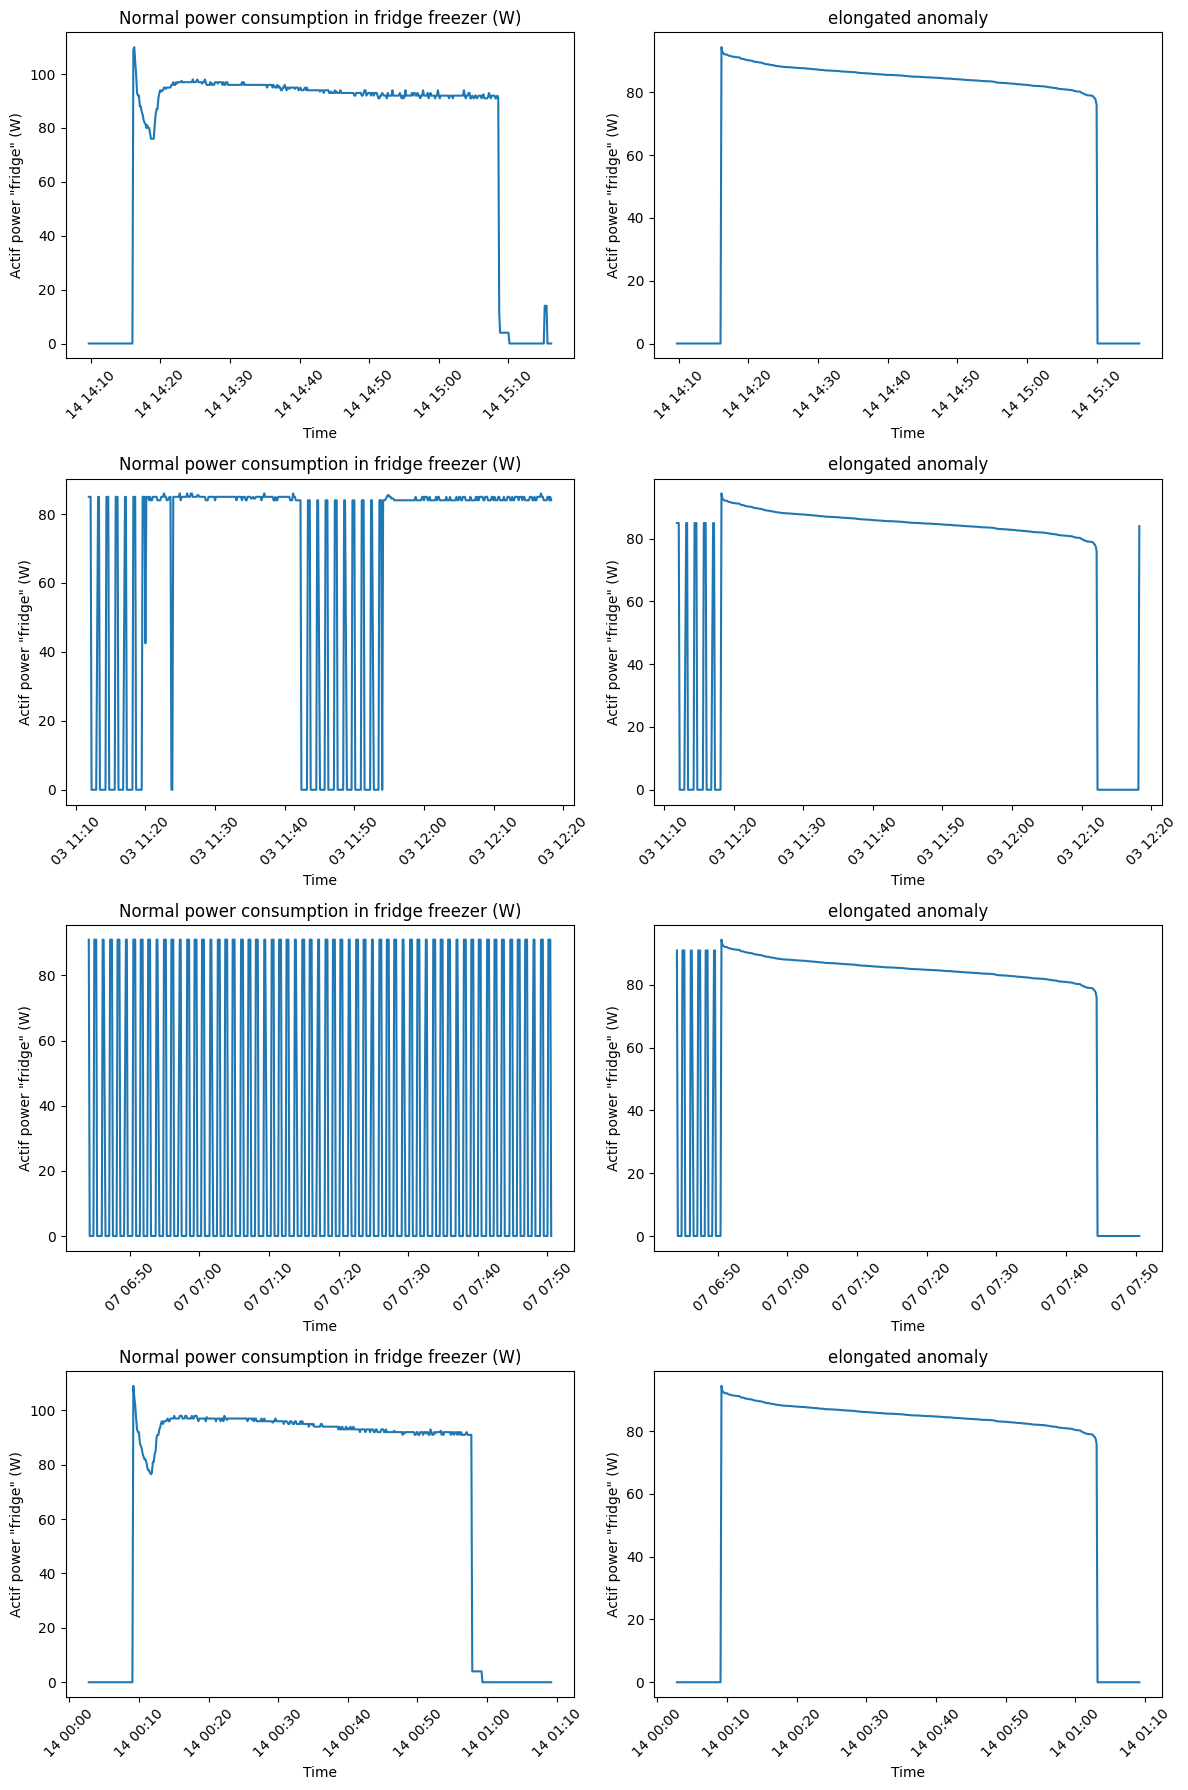

In [64]:

# Créer une nouvelle figure
plt.figure(figsize=(12, 18))

# Premier sous-graphique
plt.subplot(4, 2, 1)  # 2 lignes, 1 colonne, 1er sous-graphique
#plt.plot(house3.loc[1415974568-(3*128) : 1415978168, 'time'], house3.loc[1415974568-(3*128) : 1418896888, 'fridge freezer'])
plt.plot(house3.loc[1415974568-(3*128) : 1415978168, 'time'], house3.loc[1415974568-(3*128) : 1415978168, 'fridge freezer'])
plt.title("Normal power consumption in fridge freezer (W)")
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Actif power \"fridge\" (W)')


plt.subplot(4, 2, 2)  # 2 lignes, 1 colonne, 2e sous-graphique
plt.plot(df_anomaly.loc[1415974568-(3*128) : 1415978168, 'time'],df_anomaly.loc[1415974568-(3*128) : 1415978168, 'fridge freezer'])
plt.title("elongated anomaly")
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Actif power \"fridge\" (W)')
# Deuxième sous-graphique

plt.subplot(4, 2, 3)  # 2 lignes, 1 colonne, 1er sous-graphique
plt.plot(house3.loc[1409743096-(3*128) : 1409746696, 'time'], house3.loc[1409743096-(3*128) : 1409746696, 'fridge freezer'])
plt.title("Normal power consumption in fridge freezer (W)")
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Actif power \"fridge\" (W)')



plt.subplot(4, 2, 4)  # 2 lignes, 1 colonne, 2e sous-graphique
plt.plot(df_anomaly.loc[1409743096-(3*128) : 1409746696, 'time'],df_anomaly.loc[1409743096-(3*128) : 1409746696, 'fridge freezer'])
plt.title("elongated anomaly")
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Actif power \"fridge\" (W)')

# troisieme
plt.subplot(4, 2, 5)  # 2 lignes, 1 colonne, 1er sous-graphique
plt.plot(house3.loc[1410072632-(3*128) : 1410076232, 'time'], house3.loc[1410072632-(3*128) : 1410076232, 'fridge freezer'])
plt.title("Normal power consumption in fridge freezer (W)")
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Actif power \"fridge\" (W)')



plt.subplot(4, 2, 6)  # 2 lignes, 1 colonne, 2e sous-graphique
plt.plot(df_anomaly.loc[1410072632-(3*128) : 1410076232, 'time'], df_anomaly.loc[1410072632-(3*128) : 1410076232, 'fridge freezer'])
plt.title("elongated anomaly")
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Actif power \"fridge\" (W)')

# quatrieme
plt.subplot(4, 2, 7)  # 2 lignes, 1 colonne, 1er sous-graphique
plt.plot(house3.loc[1415923752-(3*128) : 1415927352, 'time'], house3.loc[1415923752-(3*128) : 1415927352, 'fridge freezer'])
plt.title("Normal power consumption in fridge freezer (W)")
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Actif power \"fridge\" (W)')



plt.subplot(4, 2, 8)  # 2 lignes, 1 colonne, 2e sous-graphique
plt.plot(df_anomaly.loc[1415923752-(3*128) : 1415927352, 'time'], df_anomaly.loc[1415923752-(3*128) : 1415927352, 'fridge freezer'])
plt.title("elongated anomaly")
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Actif power \"fridge\" (W)')







# Ajuster la mise en page pour éviter le chevauchement
plt.tight_layout()

# Afficher la figure
plt.show()


In [92]:
# revoir (faire tout les plotos en une seul figure )

### Ajout frequent anomali (sans chevauchement)

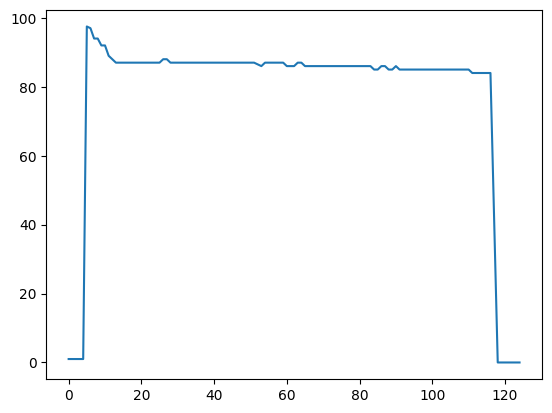

In [60]:
frequent_patern = list(house2[310:435]['fridge freezer'])
plt.plot(frequent_patern)

In [61]:
len(frequent_patern)

125

In [62]:
7200/8

900.0

In [96]:
print(900//125)
print(900%125)

7
25


In [63]:

# patern equivalent a 2h
frequent_anomaly_patern = frequent_patern * 7 + frequent_patern[:25]

In [64]:
len(frequent_anomaly_patern)

900

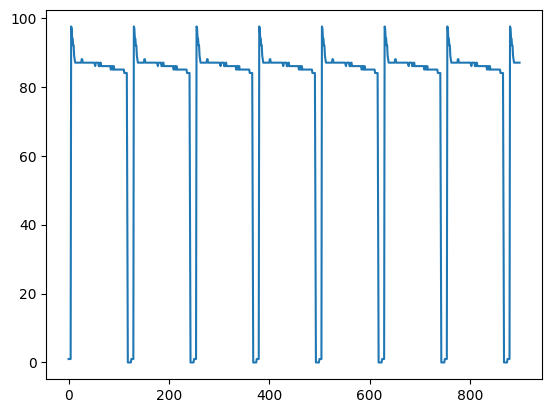

In [65]:
plt.plot(frequent_anomaly_patern)

In [66]:
df_elongated_stat

,start_index,end_index,anomaly_type,Duré
0,1418893288,1418896888,elongated,3600
1,1397444400,1397448000,elongated,3600
2,1408832048,1408835648,elongated,3600
3,1400222112,1400225712,elongated,3600
4,1424419488,1424423088,elongated,3600
5,1423484048,1423487648,elongated,3600


In [67]:
forbidden_intervals = [(row['start_index'], row['end_index']) for index, row in df_elongated_stat.iterrows()] # ne pas générer des valeurs entre ses intervals

In [68]:
forbidden_intervals

[(1418893288, 1418896888),
 (1397444400, 1397448000),
 (1408832048, 1408835648),
 (1400222112, 1400225712),
 (1424419488, 1424423088),
 (1423484048, 1423487648)]

In [69]:
random_frequent_anomalies_unix = []
while len(random_frequent_anomalies_unix) < 10:
    #candidate = random.randint(min(df['start_index']), max(df['end_index']))
    candidate = random.sample([i for i in house2.index if (i % 8 == 0)], 1)
    if all(candidate[0] < interval[0] - 7200 or candidate[0] > interval[1] + 7200 for interval in forbidden_intervals): # frq = 2h !chavauchement!
        random_frequent_anomalies_unix.append(candidate)

In [70]:
random_frequent_anomalies_unix

[[1418479928],
 [1411219880],
 [1418177624],
 [1423028088],
 [1414022216],
 [1409340904],
 [1408355368],
 [1427941488],
 [1406697240],
 [1407471680]]

<Axes: xlabel='unix'>

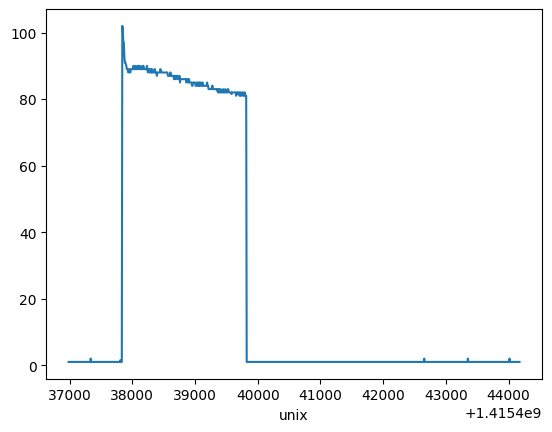

In [71]:
df_anomaly.loc[1415436984 : 1415436984+7192, 'fridge freezer'] .plot()

In [132]:
60*60

3600

In [136]:
2700   *8

21600

In [145]:
random_frequent_anomalies_unix

[[1415436984],
 [1426505424],
 [1427864168],
 [1419975032],
 [1419937944],
 [1415885352],
 [1428904408],
 [1400433120],
 [1429251488],
 [1432102352]]

In [72]:
random_frequent_anomalies_unix = [item for sublist in random_frequent_anomalies_unix for item in sublist]

In [73]:
random_frequent_anomalies_unix

[1418479928,
 1411219880,
 1418177624,
 1423028088,
 1414022216,
 1409340904,
 1408355368,
 1427941488,
 1406697240,
 1407471680]

In [77]:
cycle_stats2 = []
for unix in random_frequent_anomalies_unix:

    start_anomaly = unix
    end_unix = (unix + 7200) - 8 #  
    print(end_unix) 

    if len(frequent_anomaly_patern) == len(df_anomaly.loc[unix : end_unix]) :
        #print('yes, it is ')
        df_anomaly.loc[unix : end_unix, 'fridge freezer'] = frequent_anomaly_patern
        df_anomaly['anomaly'] = 2
    cycle_stats2.append({
        'start_index': unix,
        'end_index' : end_unix,
        'anomaly_type' : 'frequent',
        'Duré' : 7200,
    })
    

1418487120
1411227072
1418184816
1423035280
1414029408
1409348096
1408362560
1427948680
1406704432
1407478872


In [74]:
df_elongated_stat

,start_index,end_index,anomaly_type,Duré
0,1418893288,1418896888,elongated,3600
1,1397444400,1397448000,elongated,3600
2,1408832048,1408835648,elongated,3600
3,1400222112,1400225712,elongated,3600
4,1424419488,1424423088,elongated,3600
5,1423484048,1423487648,elongated,3600


In [78]:
# Création du DataFrame
cycle_stats2 = pd.DataFrame(cycle_stats2)
cycle_stats2

,start_index,end_index,anomaly_type,Duré
0,1418479928,1418487120,frequent,7200
1,1411219880,1411227072,frequent,7200
2,1418177624,1418184816,frequent,7200
3,1423028088,1423035280,frequent,7200
4,1414022216,1414029408,frequent,7200
5,1409340904,1409348096,frequent,7200
6,1408355368,1408362560,frequent,7200
7,1427941488,1427948680,frequent,7200
8,1406697240,1406704432,frequent,7200
9,1407471680,1407478872,frequent,7200


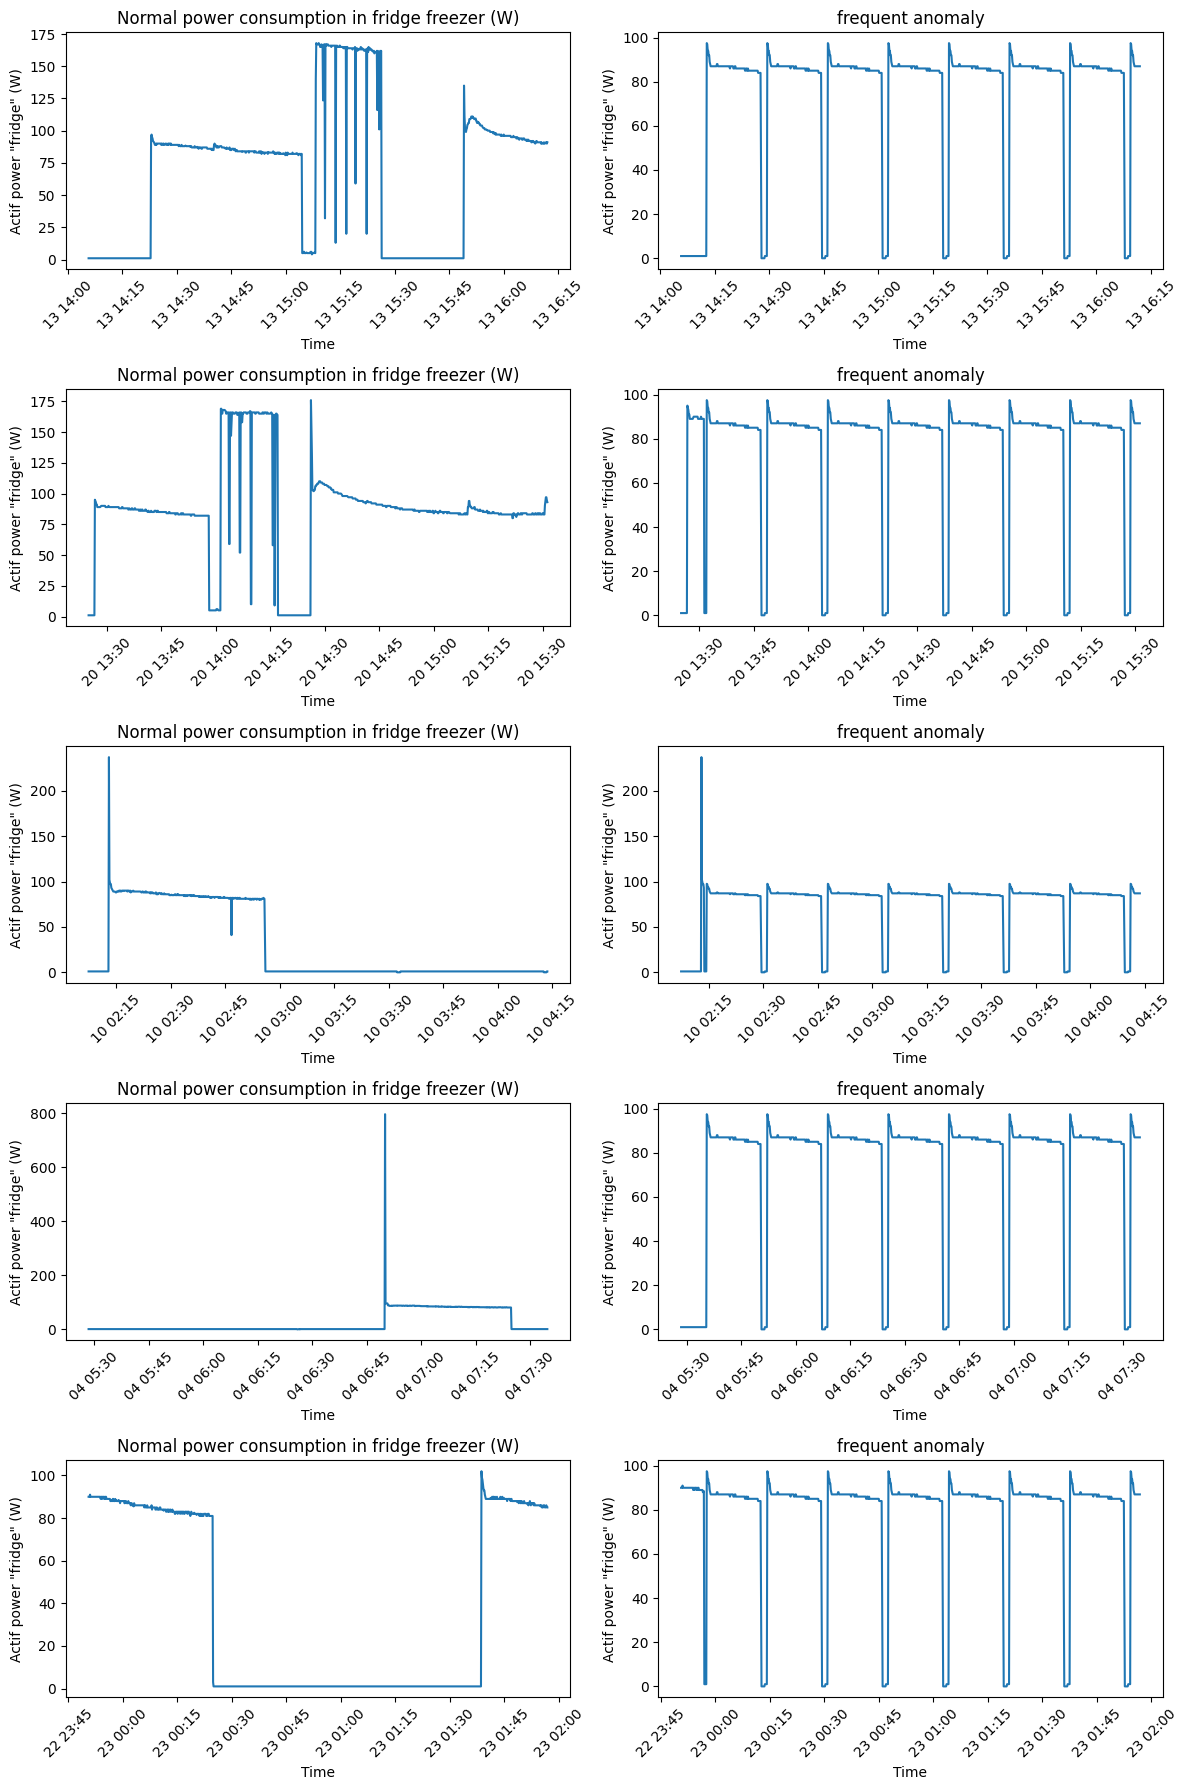

In [79]:

# Créer une nouvelle figure
plt.figure(figsize=(12, 18))

# Premier sous-graphique
plt.subplot(5, 2, 1)  # 2 lignes, 1 colonne, 1er sous-graphique
plt.plot(house2.loc[1418479928-(3*128) : 1418487120, 'time'], house2.loc[1418479928-(3*128) : 1418487120, 'fridge freezer'])
plt.title("Normal power consumption in fridge freezer (W)")
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Actif power \"fridge\" (W)')

# Deuxième sous-graphique
plt.subplot(5, 2, 2)  # 2 lignes, 1 colonne, 2e sous-graphique
plt.plot(df_anomaly.loc[1418479928-(3*128) : 1418487120, 'time'], df_anomaly.loc[1418479928-(3*128) : 1418487120, 'fridge freezer'])
plt.title("frequent anomaly")
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Actif power \"fridge\" (W)')


plt.subplot(5, 2, 3)  # 2 lignes, 1 colonne, 1er sous-graphique
plt.plot(house2.loc[1411219880-(3*128) : 1411227072, 'time'], house2.loc[1411219880-(3*128) : 1411227072, 'fridge freezer'])
plt.title("Normal power consumption in fridge freezer (W)")
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Actif power \"fridge\" (W)')


# Deuxième sous-graphique
plt.subplot(5, 2, 4)  # 2 lignes, 1 colonne, 2e sous-graphique
plt.plot(df_anomaly.loc[1411219880-(3*128) : 1411227072, 'time'], df_anomaly.loc[1411219880-(3*128) : 1411227072, 'fridge freezer'])
plt.title("frequent anomaly")
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Actif power \"fridge\" (W)')

# troisieme
plt.subplot(5, 2, 5)  # 2 lignes, 1 colonne, 1er sous-graphique
plt.plot(house2.loc[1418177624-(3*128) : 1418184816, 'time'], house2.loc[1418177624-(3*128) : 1418184816, 'fridge freezer'])
plt.title("Normal power consumption in fridge freezer (W)")
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Actif power \"fridge\" (W)')



plt.subplot(5, 2, 6)  # 2 lignes, 1 colonne, 2e sous-graphique
plt.plot(df_anomaly.loc[1418177624-(3*128) : 1418184816, 'time'],df_anomaly.loc[1418177624-(3*128) : 1418184816, 'fridge freezer'])
plt.title("frequent anomaly")
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Actif power \"fridge\" (W)')

# quatrieme

plt.subplot(5, 2, 7)  # 2 lignes, 1 colonne, 1er sous-graphique
plt.plot(house2.loc[1423028088-(3*128) : 1423035280, 'time'], house2.loc[1423028088-(3*128) : 1423035280, 'fridge freezer'])
plt.title("Normal power consumption in fridge freezer (W)")
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Actif power \"fridge\" (W)')



plt.subplot(5, 2, 8)  # 2 lignes, 1 colonne, 2e sous-graphique
plt.plot(df_anomaly.loc[1423028088-(3*128) : 1423035280, 'time'], df_anomaly.loc[1423028088-(3*128) : 1423035280, 'fridge freezer'])
plt.title("frequent anomaly")
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Actif power \"fridge\" (W)')

# cinqième

plt.subplot(5, 2, 9)  # 2 lignes, 1 colonne, 1er sous-graphique
plt.plot(house2.loc[1414022216-(3*128) : 1414029408, 'time'], house2.loc[1414022216-(3*128) : 1414029408, 'fridge freezer'])
plt.title("Normal power consumption in fridge freezer (W)")
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Actif power \"fridge\" (W)')



plt.subplot(5, 2, 10)  # 2 lignes, 1 colonne, 2e sous-graphique
plt.plot(df_anomaly.loc[1414022216-(3*128) : 1414029408, 'time'], df_anomaly.loc[1414022216-(3*128) : 1414029408, 'fridge freezer'])
plt.title("frequent anomaly")
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Actif power \"fridge\" (W)')




# Ajuster la mise en page pour éviter le chevauchement
plt.tight_layout()

# Afficher la figure
plt.show()


In [80]:
df_elongated_stat

,start_index,end_index,anomaly_type,Duré
0,1418893288,1418896888,elongated,3600
1,1397444400,1397448000,elongated,3600
2,1408832048,1408835648,elongated,3600
3,1400222112,1400225712,elongated,3600
4,1424419488,1424423088,elongated,3600
5,1423484048,1423487648,elongated,3600


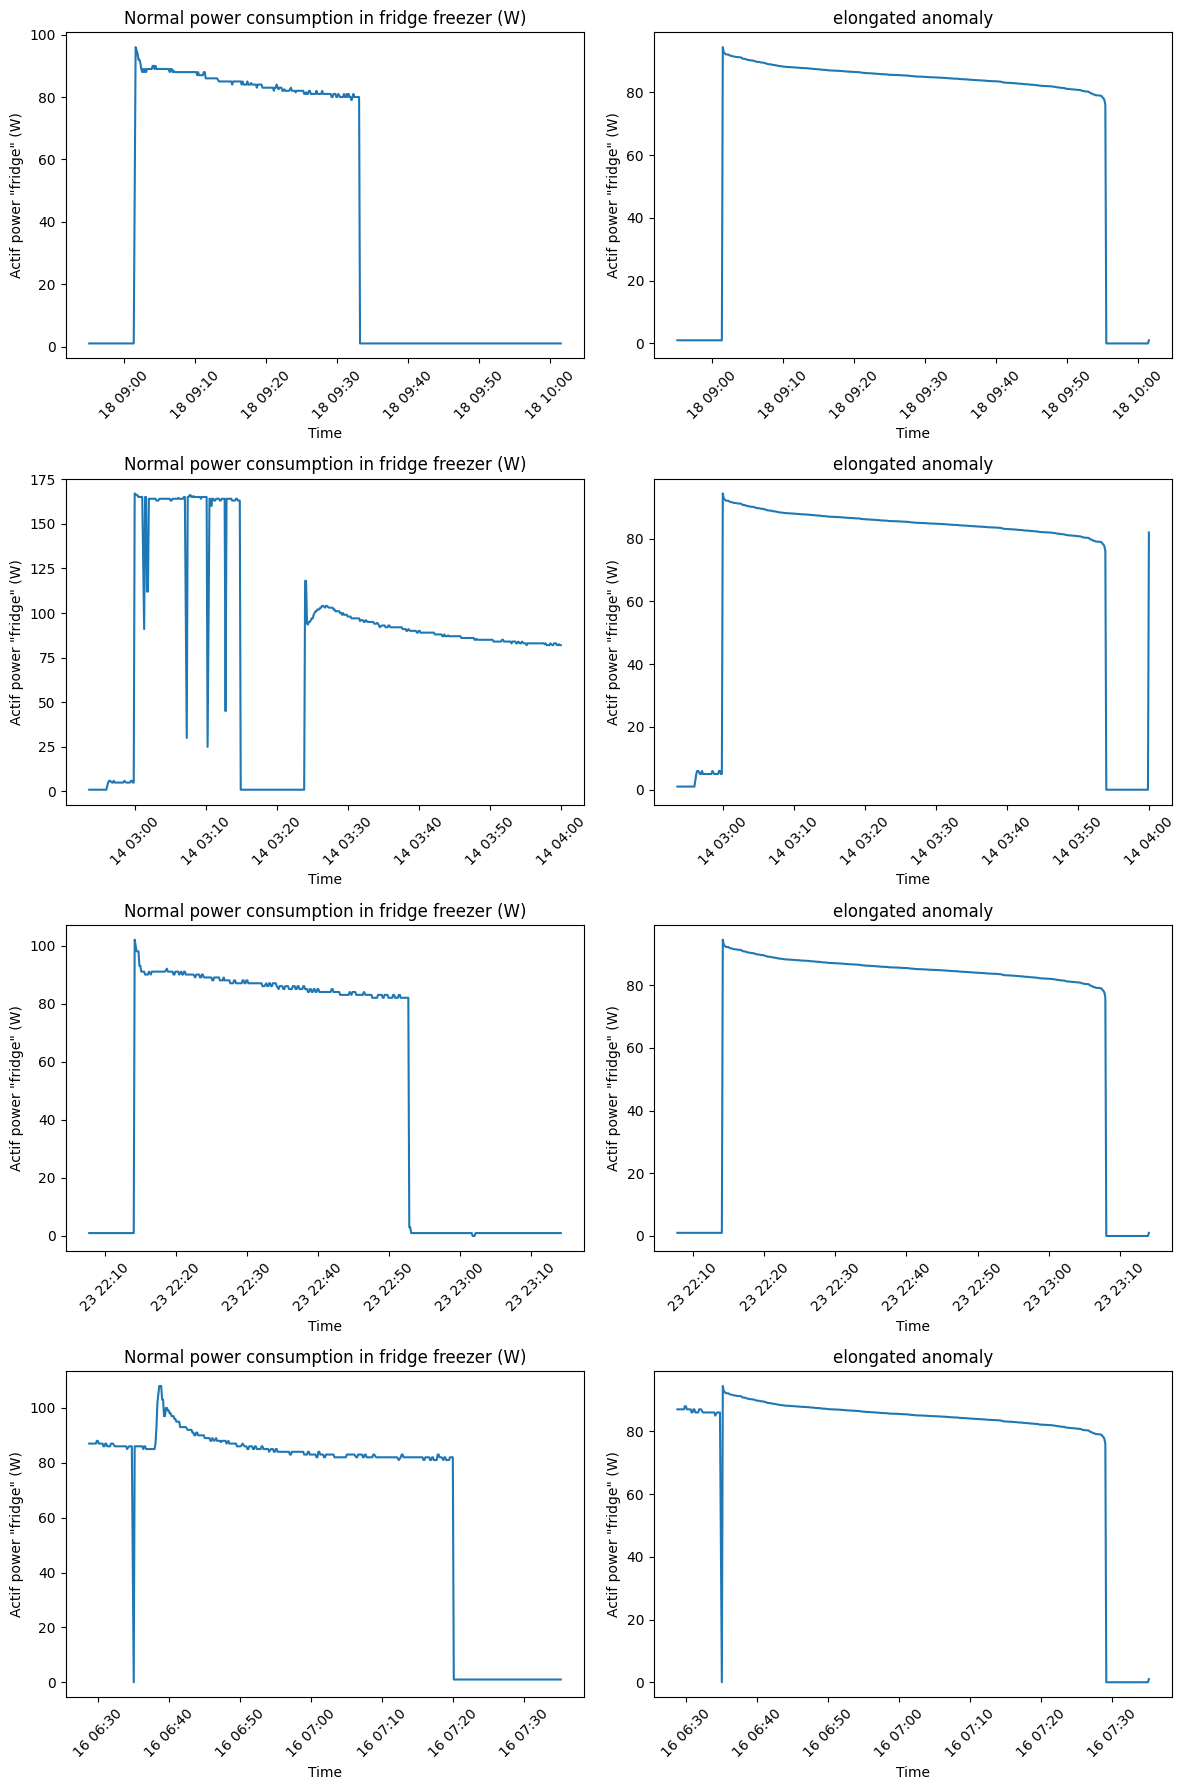

In [81]:

# Créer une nouvelle figure
plt.figure(figsize=(12, 18))

# Premier sous-graphique
plt.subplot(4, 2, 1)  # 2 lignes, 1 colonne, 1er sous-graphique
plt.plot(house2.loc[1418893288-(3*128) : 1418896888, 'time'], house2.loc[1418893288-(3*128) : 1418896888, 'fridge freezer'])
plt.title("Normal power consumption in fridge freezer (W)")
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Actif power \"fridge\" (W)')


plt.subplot(4, 2, 2)  # 2 lignes, 1 colonne, 2e sous-graphique
plt.plot(df_anomaly.loc[1418893288-(3*128) : 1418896888, 'time'],df_anomaly.loc[1418893288-(3*128) : 1418896888, 'fridge freezer'])
plt.title("elongated anomaly")
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Actif power \"fridge\" (W)')
# Deuxième sous-graphique

plt.subplot(4, 2, 3)  # 2 lignes, 1 colonne, 1er sous-graphique
plt.plot(house2.loc[1397444400-(3*128) : 1397448000, 'time'], house2.loc[1397444400-(3*128) : 1397448000, 'fridge freezer'])
plt.title("Normal power consumption in fridge freezer (W)")
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Actif power \"fridge\" (W)')



plt.subplot(4, 2, 4)  # 2 lignes, 1 colonne, 2e sous-graphique
plt.plot(df_anomaly.loc[1397444400-(3*128) : 1397448000, 'time'],df_anomaly.loc[1397444400-(3*128) : 1397448000, 'fridge freezer'])
plt.title("elongated anomaly")
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Actif power \"fridge\" (W)')

# troisieme
plt.subplot(4, 2, 5)  # 2 lignes, 1 colonne, 1er sous-graphique
plt.plot(house2.loc[1408832048-(3*128) : 1408835648, 'time'], house2.loc[1408832048-(3*128) : 1408835648, 'fridge freezer'])
plt.title("Normal power consumption in fridge freezer (W)")
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Actif power \"fridge\" (W)')



plt.subplot(4, 2, 6)  # 2 lignes, 1 colonne, 2e sous-graphique
plt.plot(df_anomaly.loc[1408832048-(3*128) : 1408835648, 'time'], df_anomaly.loc[1408832048-(3*128) : 1408835648, 'fridge freezer'])
plt.title("elongated anomaly")
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Actif power \"fridge\" (W)')

# quatrieme
plt.subplot(4, 2, 7)  # 2 lignes, 1 colonne, 1er sous-graphique
plt.plot(house2.loc[1400222112-(3*128) : 1400225712, 'time'], house2.loc[1400222112-(3*128) : 1400225712, 'fridge freezer'])
plt.title("Normal power consumption in fridge freezer (W)")
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Actif power \"fridge\" (W)')



plt.subplot(4, 2, 8)  # 2 lignes, 1 colonne, 2e sous-graphique
plt.plot(df_anomaly.loc[1400222112-(3*128) : 1400225712, 'time'], df_anomaly.loc[1400222112-(3*128) : 1400225712, 'fridge freezer'])
plt.title("elongated anomaly")
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Actif power \"fridge\" (W)')







# Ajuster la mise en page pour éviter le chevauchement
plt.tight_layout()

# Afficher la figure
plt.show()


In [84]:
df_anomaly.to_csv('H2_fridge_freezer_anomaly.csv', index=False)

In [ ]:
cycle_stats2

In [ ]:
df_elongated_stat

In [85]:
df_stat= pd.concat([cycle_stats2, df_elongated_stat], ignore_index=True)
df_stat

,start_index,end_index,anomaly_type,Duré
0,1418479928,1418487120,frequent,7200
1,1411219880,1411227072,frequent,7200
2,1418177624,1418184816,frequent,7200
3,1423028088,1423035280,frequent,7200
4,1414022216,1414029408,frequent,7200
5,1409340904,1409348096,frequent,7200
6,1408355368,1408362560,frequent,7200
7,1427941488,1427948680,frequent,7200
8,1406697240,1406704432,frequent,7200
9,1407471680,1407478872,frequent,7200


In [86]:
df_stat.to_csv('H2_fridge_freezer_anomaly_stat.csv')

## table de transition for normale consumption

In [ ]:
house2.head(2)

,time,fridge freezer,État
unix,,,
1395360000,2014-03-21 00:00:00,1.0,1
1395360008,2014-03-21 00:00:08,1.0,1


In [ ]:
house2['État2'] = house2['État'].shift(1)
house2.head(2)

,time,fridge freezer,État,État2
unix,,,,
1395360000,2014-03-21 00:00:00,1.0,1,NaN
1395360008,2014-03-21 00:00:08,1.0,1,1.0


In [ ]:
house2['État2'] = house2['État2'].fillna(0)

In [ ]:
transition_matrix_ = pd.crosstab(house2['État'], house2['État2'])
print(transition_matrix_)

État2      0.0      1.0  2.0
État                        
0      1733129     8456  363
1         8810  2925165    0
2           10      353  115


In [ ]:
transition_matrix_proba = pd.crosstab(house2['État'], house2['État2'], normalize= 'index')
print(transition_matrix_proba)

État2       0.0       1.0       2.0
État                               
0      0.994937  0.004854  0.000208
1      0.003003  0.996997  0.000000
2      0.020921  0.738494  0.240586


## trasition matrix for df with anomaly

In [ ]:
# first i need to do kmeans again
fridge_data_anomay = df_elongated_anomaly['fridge freezer'].values.reshape(-1, 1)

#  application de K-means
kmeans = KMeans(n_clusters=3, random_state=10).fit(fridge_data_anomay)
labels = kmeans.labels_
df_elongated_anomaly['État'] = labels


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df_elongated_anomaly.head(1)

,time,fridge freezer,État,anomaly
unix,,,,
1395360000,2014-03-21,1.0,0,NaN


In [ ]:
df_elongated_anomaly['État2'] = df_elongated_anomaly['État'].shift(1)
df_elongated_anomaly['État2'] = df_elongated_anomaly['État2'].fillna(0)

In [ ]:
transition_matrix_anomaly = pd.crosstab(df_elongated_anomaly['État'], df_elongated_anomaly['État2'])
print(transition_matrix_anomaly)

État2      0.0      1.0  2.0
État                        
0      2918150     8786    0
1         8435  1740193  361
2          351       10  115


In [ ]:
transition_matrix_proba2 = pd.crosstab(df_elongated_anomaly['État'], df_elongated_anomaly['État2'], normalize= 'index')
print(transition_matrix_proba2)

État2       0.0       1.0       2.0
État                               
0      0.996998  0.003002  0.000000
1      0.004823  0.994971  0.000206
2      0.737395  0.021008  0.241597
